In [ ]:
from tensorflow.keras.datasets.cifar10 import load_data
(x_train, y_train), (x_test, y_test) = load_data()

In [2]:
print(x_train.shape)
print(x_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)


In [4]:
trans = [
    "airplane",									
    "automobile",										
    "bird",										
    "cat",										
    "deer",										
    "dog",										
    "frog",										
    "horse",										
    "ship",										
    "truck",
]

ship


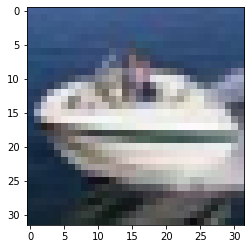

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline
idx = 222
print(trans[y_train[idx][0]])
plt.imshow(x_train[idx])

In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Dense, Flatten, Dropout

layers = [
    # 27 (1 filter) * 64 + 64(bias) = 1792
    Conv2D(64, kernel_size=3, padding="same", activation="relu", input_shape=(32, 32, 3)),
    MaxPooling2D(),
    # 576 (1 filter) * 128 + 128(bias) = 73856
    Conv2D(128, kernel_size=3, padding="same", activation="relu"),
    MaxPooling2D(),
    Conv2D(256, kernel_size=3, padding="same", activation="relu"),
    MaxPooling2D(),
    Conv2D(512, kernel_size=3, padding="same", activation="relu"),
    MaxPooling2D(),
    Flatten(),
    Dense(256, activation="relu"),
    Dropout(0.25),
    Dense(10, activation="softmax")
]
model = Sequential(layers)
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 32, 32, 64)        1792      
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 16, 16, 128)       73856     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 8, 8, 128)         0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 8, 8, 256)         295168    
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 4, 4, 256)         0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 4, 4, 512)        

In [13]:
from tensorflow.keras.losses import SparseCategoricalCrossentropy
model.compile(loss=SparseCategoricalCrossentropy(),
              optimizer="adam",
              metrics=["accuracy"])

In [14]:
x_train_norm = x_train / 255
x_test_norm = x_test / 255

In [15]:
# validation_split: 留下一些訓練資料來看模型好不好
# batch_size: 看多少筆做一次平均梯度
# epochs: 整份資料看幾遍
# verboes: log的詳細程度[1:進度條 0:空無一度 2:必要的就好]
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
c = [
     ModelCheckpoint("cnn.h5", save_best_only=True),
     EarlyStopping(patience=3, restore_best_weights=True)
]
model.fit(x_train_norm,
          # Sparse
          y_train,
          validation_split=0.1,
          batch_size=200,
          epochs=50,
          verbose=2,
          callbacks=c)

Epoch 1/50
225/225 - 3s - loss: 1.6699 - accuracy: 0.3816 - val_loss: 1.3240 - val_accuracy: 0.5268
Epoch 2/50
225/225 - 3s - loss: 1.1599 - accuracy: 0.5864 - val_loss: 1.0023 - val_accuracy: 0.6516
Epoch 3/50
225/225 - 3s - loss: 0.9323 - accuracy: 0.6701 - val_loss: 0.8575 - val_accuracy: 0.7016
Epoch 4/50
225/225 - 3s - loss: 0.7675 - accuracy: 0.7311 - val_loss: 0.7315 - val_accuracy: 0.7470
Epoch 5/50
225/225 - 3s - loss: 0.6333 - accuracy: 0.7785 - val_loss: 0.7099 - val_accuracy: 0.7574
Epoch 6/50
225/225 - 3s - loss: 0.5192 - accuracy: 0.8200 - val_loss: 0.6716 - val_accuracy: 0.7668
Epoch 7/50
225/225 - 3s - loss: 0.4232 - accuracy: 0.8540 - val_loss: 0.6746 - val_accuracy: 0.7762
Epoch 8/50
225/225 - 3s - loss: 0.3181 - accuracy: 0.8906 - val_loss: 0.7481 - val_accuracy: 0.7768
Epoch 9/50
225/225 - 3s - loss: 0.2409 - accuracy: 0.9176 - val_loss: 0.7409 - val_accuracy: 0.7816


In [16]:
model.evaluate(x_test_norm, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.7126 - accuracy: 0.7567


[0.7126315236091614, 0.7566999793052673]

In [17]:
pre = model.predict_classes(x_test_norm)
pre

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


array([3, 8, 8, ..., 5, 4, 7])

In [20]:
# pre, y_test shape
print(y_test.shape)
print(pre.shape)
y_test_reshape = y_test.reshape(-1)
print(y_test_reshape.shape)

(10000, 1)
(10000,)
(10000,)


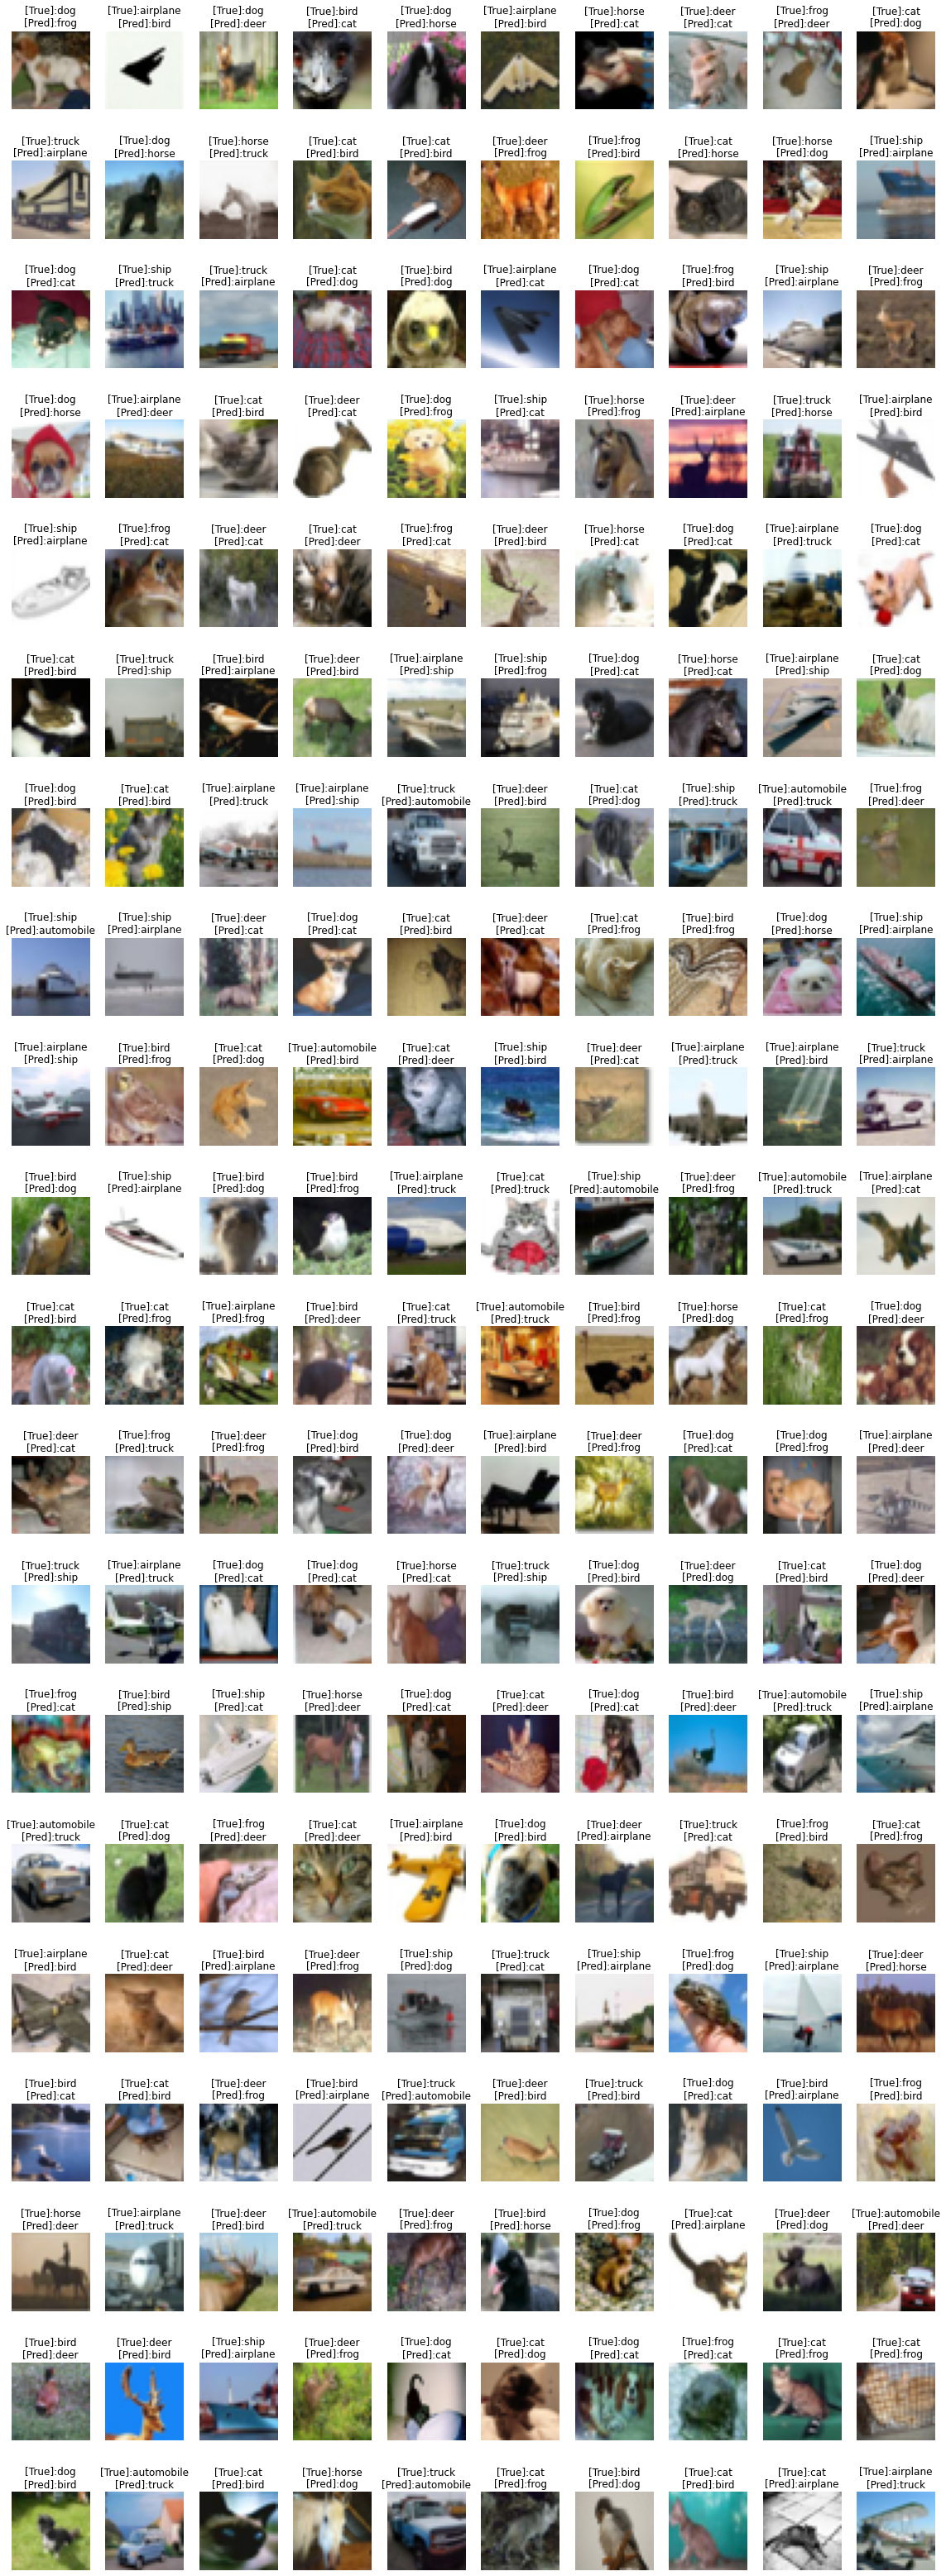

In [23]:
import numpy as np
idx = np.nonzero(pre != y_test_reshape)[0]
idx = idx[:200]
false_label = y_test_reshape[idx]
false_pred = pre[idx]
false_img = x_test[idx]

plt.figure(figsize=(20, 60))
width = 10
height = len(idx) // width + 1
for i, img in enumerate(false_img):
    plt.subplot(height, width, i+1)
    t = "[True]:{}\n[Pred]:{}".format(trans[false_label[i]],
                                      trans[false_pred[i]])
    plt.title(t)
    plt.axis("off")
    plt.imshow(img)